# LEZIONE 17 - Metriche di Classificazione: Precision, Recall, F1, ROC-AUC, PR-AUC

## Obiettivi della Lezione
Al termine di questa lezione sarai in grado di:
1. Calcolare e interpretare **precision, recall, F1-score**
2. Leggere e confrontare **ROC-AUC** e **PR-AUC**
3. Scegliere **soglie ottimali** (Youden J, F1 max)
4. Analizzare il trade-off precision/recall su classi sbilanciate
5. Validare modelli con **confusion matrix** e curve

## Prerequisiti
| Concetto | Dove lo trovi |
|----------|---------------|
| Logistic Regression | Lezione 11 |
| Train/Test Split | Lezione 10 |
| Bilanciamento classi | Lezione 12 |

## Indice
1. SEZIONE 1 - Teoria
2. SEZIONE 2 - Mappa Mentale
3. SEZIONE 3 - Notebook Dimostrativo
4. SEZIONE 4 - Metodi Principali
5. SEZIONE 5 - Glossario
6. SEZIONE 6 - Errori Comuni
7. SEZIONE 7 - Conclusione
8. SEZIONE 8 - Checklist
9. SEZIONE 9 - Changelog

---

## Librerie Utilizzate
```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, precision_score, recall_score, f1_score,
    roc_curve, roc_auc_score, precision_recall_curve, auc, classification_report
)
from sklearn.ensemble import RandomForestClassifier
```


---

## SEZIONE 1 - Teoria

### 1.1 Confusion Matrix e Classi Sbilanciate
- Confusion matrix: TP, FP, TN, FN
- Dataset sbilanciato: accuracy ingannevole -> servono precision/recall

### 1.2 Precision, Recall, F1
- Precision = TP / (TP + FP) -> quanto sono pulite le predizioni positive
- Recall = TP / (TP + FN) -> quanti positivi veri recuperiamo
- F1 = 2 * (precision * recall) / (precision + recall) -> media armonica, punisce squilibri

### 1.3 ROC vs PR Curve
- ROC: TPR vs FPR, buona con dati bilanciati
- PR: Precision vs Recall, piu informativa con classi rare
- AUC: area sotto la curva (ROC-AUC, PR-AUC)

### 1.4 Scelta della Soglia
- Default 0.5 non e ottimale
- Criteri: Youden J (TPR - FPR), F1 massimo, precision target, recall target

### 1.5 Metriche Macro vs Weighted
- Macro: media non pesata tra classi (tratta tutte le classi uguali)
- Weighted: media pesata per support (pesa le classi grandi)

### 1.6 Quando usare cosa
| Scenario | Metrica principale | Secondaria |
|----------|--------------------|------------|
| Allerta medica (pochi falsi negativi) | Recall | Precision |
| Filtri spam (pochi falsi positivi) | Precision | Recall |
| Modelli bilanciati | F1 / Accuracy | ROC-AUC |
| Classi rare | PR-AUC | Recall/Precision |


---

## SEZIONE 2 - Mappa Mentale
```
CLASSIFICATION METRICS
├─ CONFUSION MATRIX
│   ├─ TP, FP, TN, FN
│   └─ Accuracy ingannevole se classi sbilanciate
├─ PRECISION / RECALL / F1
│   ├─ Precision: TP / (TP+FP)
│   ├─ Recall:    TP / (TP+FN)
│   └─ F1: media armonica (equilibrio)
├─ CURVE
│   ├─ ROC: TPR vs FPR, buona su bilanciati
│   └─ PR:  Precision vs Recall, meglio su rari
├─ THRESHOLD TUNING
│   ├─ Youden J (TPR-FPR)
│   ├─ F1 massimo
│   ├─ Target recall (es. ≥ 0.9)
│   └─ Target precision (es. ≥ 0.9)
└─ REPORT
    ├─ classification_report (precision/recall/F1 per classe)
    ├─ macro vs weighted average
    └─ support
```


---

## SEZIONE 3 - Notebook Dimostrativo
**Contenuto:** 5 esercizi pratici con micro-checkpoint
1. Es 17.1 - Confusion Matrix e metriche base
2. Es 17.2 - Precision-Recall Curve e PR-AUC
3. Es 17.3 - ROC Curve e ROC-AUC (modelli a confronto)
4. Es 17.4 - Scelta soglia ottimale (Youden J, F1 max)
5. Es 17.5 - Report completo macro vs weighted (sbilanciato)


Confusion Matrix (label 1 = positivi):
[[167  33]
 [ 45 155]]
Precision: 0.824 | Recall: 0.775 | F1: 0.799


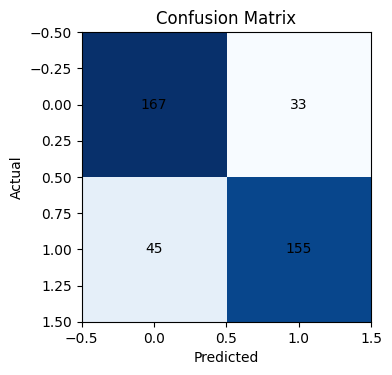

[CHECKPOINT 17.1] PASS!


In [3]:
# ============================================================
# ESERCIZIO 17.1 - Confusion Matrix e Metriche Base
# ============================================================
"""
Dataset bilanciato sintetico. Modello: Logistic Regression.
Obiettivo: calcolare confusion matrix, precision, recall, F1.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

X, y = make_classification(
    n_samples=2000, n_features=20, n_informative=6, n_redundant=4,
    weights=[0.5, 0.5], random_state=42
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=200, solver='lbfgs')
log_reg.fit(X_train, y_train)

proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = (proba >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Confusion Matrix (label 1 = positivi):")
print(cm)
print(f"Precision: {prec:.3f} | Recall: {rec:.3f} | F1: {f1:.3f}")

# Plot confusion matrix
plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# MICRO-CHECKPOINT 17.1
# ----------------------------------------------------------
assert cm.sum() == len(y_test), "CM deve sommare al numero di test samples"
assert 0 <= prec <= 1 and 0 <= rec <= 1, "Metriche fuori range"
print("[CHECKPOINT 17.1] PASS!")

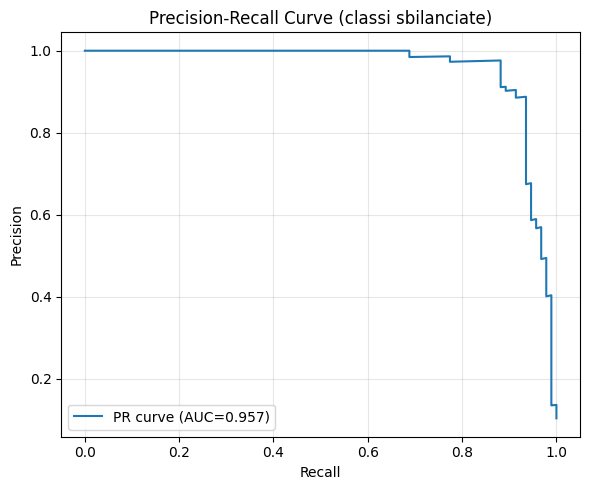

PR-AUC: 0.957
Precision massima con recall >= 0.80: 0.976
[CHECKPOINT 17.2] PASS!


In [6]:
# ============================================================
# ESERCIZIO 17.2 - Precision-Recall Curve e PR-AUC
# ============================================================
"""
Dataset sbilanciato (positivi rari). Obiettivo: PR curve, PR-AUC.
Migliorato: maggiore separabilita, modello con class_weight.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc

X_imb, y_imb = make_classification(
    n_samples=3000, n_features=15, n_informative=8, n_redundant=2,
    weights=[0.9, 0.1], class_sep=1.5, random_state=7
)
Xtr, Xte, ytr, yte = train_test_split(X_imb, y_imb, test_size=0.3, random_state=7, stratify=y_imb)

clf_pr = RandomForestClassifier(
    n_estimators=400,
    max_depth=8,
    class_weight='balanced',
    random_state=7,
)
clf_pr.fit(Xtr, ytr)
proba_pr = clf_pr.predict_proba(Xte)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(yte, proba_pr)
pr_auc = auc(recalls, precisions)

plt.figure(figsize=(6, 5))
plt.plot(recalls, precisions, label=f'PR curve (AUC={pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (classi sbilanciate)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Precision a recall target
recall_target = 0.80
mask = recalls >= recall_target
precision_at_target = precisions[mask].max()

print(f"PR-AUC: {pr_auc:.3f}")
print(f"Precision massima con recall >= {recall_target:.2f}: {precision_at_target:.3f}")

# ----------------------------------------------------------
# MICRO-CHECKPOINT 17.2
# ----------------------------------------------------------
assert pr_auc > 0.5, "PR-AUC deve superare baseline (positivi rari)"
assert precision_at_target >= 0.5, "Precision a recall 0.80 troppo bassa"
print("[CHECKPOINT 17.2] PASS!")

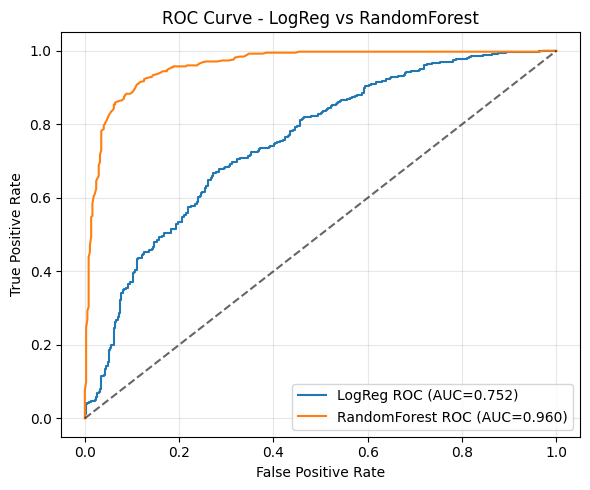

AUC LogReg: 0.752 | AUC RF: 0.960
[CHECKPOINT 17.3] PASS!


In [8]:
# ============================================================
# ESERCIZIO 17.3 - ROC Curve e ROC-AUC (LogReg vs RandomForest)
# ============================================================
"""
Confronto tra due modelli sullo stesso dataset bilanciato.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score

Xr, yr = make_classification(
    n_samples=2500, n_features=18, n_informative=7, n_redundant=5,
    weights=[0.5, 0.5], random_state=21
)
Xr_tr, Xr_te, yr_tr, yr_te = train_test_split(Xr, yr, test_size=0.3, random_state=21, stratify=yr)

logr = LogisticRegression(max_iter=300, solver='lbfgs')
rf_cls = RandomForestClassifier(n_estimators=200, random_state=21)
logr.fit(Xr_tr, yr_tr)
rf_cls.fit(Xr_tr, yr_tr)

proba_log = logr.predict_proba(Xr_te)[:, 1]
proba_rf = rf_cls.predict_proba(Xr_te)[:, 1]

fpr_log, tpr_log, _ = roc_curve(yr_te, proba_log)
fpr_rf, tpr_rf, _ = roc_curve(yr_te, proba_rf)
auc_log = roc_auc_score(yr_te, proba_log)
auc_rf = roc_auc_score(yr_te, proba_rf)

plt.figure(figsize=(6, 5))
plt.plot(fpr_log, tpr_log, label=f'LogReg ROC (AUC={auc_log:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'RandomForest ROC (AUC={auc_rf:.3f})')
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LogReg vs RandomForest')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"AUC LogReg: {auc_log:.3f} | AUC RF: {auc_rf:.3f}")

# ----------------------------------------------------------
# MICRO-CHECKPOINT 17.3
# ----------------------------------------------------------
assert auc_rf >= auc_log - 0.02, "RF non deve andare molto peggio della LogReg"
assert auc_log > 0.7 and auc_rf > 0.7, "AUC troppo bassa, modello da rivedere"
print("[CHECKPOINT 17.3] PASS!")

Soglia Youden J: 0.536 (J=0.635)
Soglia F1 max:  0.289 (F1=0.813)


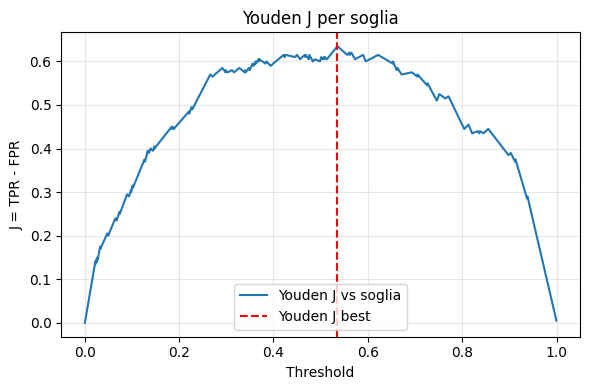

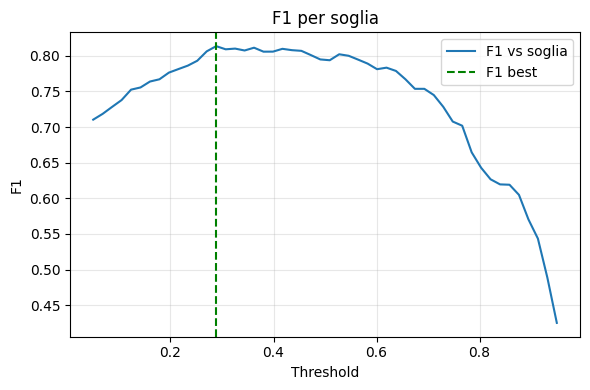

[CHECKPOINT 17.4] PASS!


In [9]:
# ============================================================
# ESERCIZIO 17.4 - Scelta della Soglia (Youden J, F1 max)
# ============================================================
"""
Usiamo il modello LogReg del dataset bilanciato di Es 17.1.
"""

# Riutilizziamo log_reg, proba dal primo esercizio
fpr, tpr, roc_th = roc_curve(y_test, proba)
j_scores = tpr - fpr
best_j_idx = np.argmax(j_scores)
best_j_th = roc_th[best_j_idx]

# F1 massimo su grid
thr_grid = np.linspace(0.05, 0.95, 50)
f1_vals = []
for th in thr_grid:
    pred = (proba >= th).astype(int)
    f1_vals.append(f1_score(y_test, pred))
best_f1_idx = int(np.argmax(f1_vals))
best_f1_th = thr_grid[best_f1_idx]

print(f"Soglia Youden J: {best_j_th:.3f} (J={j_scores[best_j_idx]:.3f})")
print(f"Soglia F1 max:  {best_f1_th:.3f} (F1={max(f1_vals):.3f})")

plt.figure(figsize=(6, 4))
plt.plot(roc_th, j_scores, label='Youden J vs soglia')
plt.axvline(best_j_th, color='red', linestyle='--', label='Youden J best')
plt.xlabel('Threshold')
plt.ylabel('J = TPR - FPR')
plt.title('Youden J per soglia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(thr_grid, f1_vals, label='F1 vs soglia')
plt.axvline(best_f1_th, color='green', linestyle='--', label='F1 best')
plt.xlabel('Threshold')
plt.ylabel('F1')
plt.title('F1 per soglia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# MICRO-CHECKPOINT 17.4
# ----------------------------------------------------------
assert 0 < best_j_th < 1, "Soglia J fuori range"
assert 0 < best_f1_th < 1, "Soglia F1 fuori range"
assert max(f1_vals) >= f1, "F1 ottimizzato non deve essere peggiore del default"
print("[CHECKPOINT 17.4] PASS!")

In [ ]:
# ============================================================
# ESERCIZIO 17.5 - Report Macro vs Weighted su dataset molto sbilanciato
# ============================================================
"""
Creiamo un dataset con classe positiva 5%. Confrontiamo macro vs weighted.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

Xh, yh = make_classification(
    n_samples=4000, n_features=12, n_informative=5, n_redundant=3,
    weights=[0.95, 0.05], class_sep=1.8, random_state=11
)
Xh_tr, Xh_te, yh_tr, yh_te = train_test_split(Xh, yh, test_size=0.25, random_state=11, stratify=yh)

clf_h = RandomForestClassifier(n_estimators=400, random_state=11, class_weight='balanced')
clf_h.fit(Xh_tr, yh_tr)
proba_h = clf_h.predict_proba(Xh_te)[:, 1]
pred_h = (proba_h >= 0.25).astype(int)  # soglia piu bassa per alzare recall

report = classification_report(yh_te, pred_h, digits=3, output_dict=True)
macro_f1 = report['macro avg']['f1-score']
weighted_f1 = report['weighted avg']['f1-score']

print("Classification report (soglia 0.25):")
print(classification_report(yh_te, pred_h, digits=3))
print(f"Macro F1: {macro_f1:.3f} | Weighted F1: {weighted_f1:.3f}")

# ----------------------------------------------------------
# MICRO-CHECKPOINT 17.5
# ----------------------------------------------------------
assert macro_f1 > 0.6, "Macro F1 troppo basso: il modello non generalizza sulle classi"
assert weighted_f1 > 0.8, "Weighted F1 troppo basso rispetto al supporto"
print("[CHECKPOINT 17.5] PASS!")

NameError: name 'classification_report' is not defined

---

## SEZIONE 4 - Metodi e Funzioni

| Metodo/Attributo | Descrizione | Esempio |
|------------------|-------------|---------|
| `confusion_matrix()` | Restituisce matrice TP/FP/TN/FN | `confusion_matrix(y_true, y_pred)` |
| `precision_score()` | Precision globale | `precision_score(y_true, y_pred)` |
| `recall_score()` | Recall globale | `recall_score(y_true, y_pred)` |
| `f1_score()` | F1 globale | `f1_score(y_true, y_pred)` |
| `roc_curve()` | FPR/TPR per soglie | `roc_curve(y_true, proba)` |
| `roc_auc_score()` | Area sotto ROC | `roc_auc_score(y_true, proba)` |
| `precision_recall_curve()` | Precision/Recall per soglie | `precision_recall_curve(y_true, proba)` |
| `auc()` | Area generica (es. PR-AUC) | `auc(x, y)` |
| `classification_report()` | Precision/Recall/F1 per classe | `classification_report(y_true, y_pred)` |
| `class_weight='balanced'` | Pesa classi sbilanciate | in fit() di molti modelli |


---

## SEZIONE 5 - Glossario (20 termini)
| # | Termine | Definizione |
|---|---------|-------------|
| 1 | True Positive (TP) | Positivo previsto e corretto |
| 2 | False Positive (FP) | Positivo previsto ma errato |
| 3 | True Negative (TN) | Negativo previsto e corretto |
| 4 | False Negative (FN) | Negativo previsto ma errato |
| 5 | Precision | TP / (TP + FP) |
| 6 | Recall (Sensitivity) | TP / (TP + FN) |
| 7 | Specificity | TN / (TN + FP) |
| 8 | F1-score | Media armonica di precision e recall |
| 9 | Support | Numero di esempi per classe |
| 10 | ROC Curve | TPR vs FPR al variare della soglia |
| 11 | ROC-AUC | Area sotto la ROC |
| 12 | PR Curve | Precision vs Recall |
| 13 | PR-AUC | Area sotto la PR curve |
| 14 | Threshold | Soglia di decisione per classificazione |
| 15 | Youden J | TPR - FPR, usato per soglia ottimale |
| 16 | Class Weight | Pesi per classi sbilanciate |
| 17 | Macro Average | Media non pesata tra classi |
| 18 | Weighted Average | Media pesata per support |
| 19 | Imbalanced Data | Dataset con classi rare |
| 20 | Calibration | Allineare probabilita previste a frequenze reali |


---

## SEZIONE 6 - Errori Comuni (10)
| # | Errore | Problema | Soluzione |
|---|--------|----------|-----------|
| 1 | Guardare solo accuracy | Sbilanciati -> accuracy ingannevole | Usare precision/recall/F1 |
| 2 | Soglia fissa 0.5 | Non ottimale per il caso d'uso | Ottimizzare soglia |
| 3 | Ignorare PR curve su rari | ROC appare buona | Usare PR-AUC |
| 4 | Non stratificare split | Distribuzione classi alterata | train_test_split(stratify=y) |
| 5 | Nessun class_weight | Classe rara sottopesata | class_weight='balanced' |
| 6 | Non fissare random_state | Risultati non replicabili | Impostare random_state |
| 7 | Soglia scelta sui dati di test | Leakage | Ottimizzare su validation |
| 8 | Confondere macro vs weighted | Interpretazioni errate | Scegli in base a obiettivo |
| 9 | Non controllare FP/FN | Trade-off non gestito | Analizzare confusion matrix |
| 10 | Curva ROC con pochi positivi | Falso senso di qualita | Preferire PR curve |


---

## SEZIONE 7 - Conclusioni
1. Precision/Recall descrivono il trade-off FP/FN meglio della sola accuracy.
2. PR-AUC e preferibile con classi rare; ROC-AUC va bene su dati bilanciati.
3. La soglia di default 0.5 e raramente ottimale: ottimizzarla.
4. Macro vs weighted: scegli in base a equita tra classi o al supporto.
5. Confusion matrix resta la base per leggere errori di un modello.


---

## SEZIONE 8 - Checklist di Apprendimento
- [ ] So calcolare TP/FP/TN/FN e leggere una confusion matrix
- [ ] So calcolare precision, recall, F1
- [ ] So tracciare ROC e calcolare ROC-AUC
- [ ] So tracciare PR curve e calcolare PR-AUC
- [ ] So trovare soglia con Youden J
- [ ] So trovare soglia che massimizza F1
- [ ] So lavorare con classi sbilanciate (class_weight, soglia piu bassa)
- [ ] So scegliere macro vs weighted per il report
- [ ] So interpretare un classification_report
- [ ] So fissare random_state e stratify per replicabilita


---

## SEZIONE 9 - Changelog
| Versione | Data | Modifiche |
|----------|------|-----------|
| 1.0 | 2025-01-XX | Creazione notebook metriche di classificazione |
| 2.0 | 2025-01-XX | Ristrutturazione template 9 sezioni, 5 esercizi con checkpoint |
